# Natural Language Processing Project<a class="anchor" id="top"></a>
## Team Members
[Bethany Thompson](https://github.com/ThompsonBethany01) & [Bibek Mainali](https://github.com/MainaliB)
## Goals 
Predict a repository coding language by it's readme file.
- Acquire data on GitHub's trending repositories
- Clean data by normalizing any text
- Explore trends in text within each coding language
- Create a classification model to predict the coding language

## Conclusions
- Trends: Readme's typically state the language used frequently
- Model Metrics: TF-iDF + LogisticRegession performed 100% on train and 77.05% on test

## Reproduction Requirements
### Files
In your working directory, download:
- Data_Analysis.ipynb
- Acquire.py
- Prepare.py  

### Tools
- Python 3.7.6
- Pandas 1.0.1
- Seaborn 0.12.0.dev0

## Table of Contents
1. [Acquisition](#first-bullet)
2. [Preparation](#second-bullet)
3. [Exploration](#third-bullet)
4. [Modeling](#fourth-bullet)
5. [Final Conclusions](#fifth-bullet)

# Acquisition <a class="anchor" id="first-bullet"></a>
For this project, we have to build the dataset. We decided on a list of GitHub repositories to scrape, and wrote the python code necessary to extract the text of the README file for each page, and the primary language of the repository.

To can find the language of a repository:
1. Visit Main Page of Repo
1. Locate Bottom Right Side of Repo stating **Languages** 
2. html code ```<ul class="list-style-none">```

The only requirement is to include at least 100 repositories in our data set.

## Repositories Chosen
- GitHub's Trending English Repositories - At Least 25 from Top 4 Most Popular Coding Languages
     - Python
     - Java
     - Swift
     - Something Else


In [1]:
# Acquire Imports
import pandas as pd
import numpy as np
from requests import get
from bs4 import BeautifulSoup
import os

# Acquire.py Module
import Acquire

## Acquire.get_top_repo Function
- Scrapes repository names from the trending GitHub repo page, acquiring 25 from each coding language filter of Python, Java, Javescript, and Swift
- creates url from repo name user/repo_name

## Steps to Acquire Repository Data & Combine Together
1. Run get_top_repo with parameters for the coding language and time period, finds urls of these repos
2. Run get_content_df with parameter as the urls run from above function
3. Run prepare_df with parameter as the df created from the tow above functions.
4. Repeat steps 1-3, and append the newly acquired data to the first df created
5. Continue to acquire data with these steps

In [2]:
df = pd.read_csv('final_df.csv', index_col = 0)

In [3]:
df = df.reset_index().drop('index', axis = 1)

In [4]:
# first run getting the top repo links from the top trending repos in different programming language for the day


# urls = Acquire.get_top_repo(['python','java','javascript','swift'],'daily')

In [5]:
# getting the content of the read me 


# df = Acquire.get_content_df(urls['link'])

In [6]:
df.link.head()

0               https://github.com/ytdl-org/youtube-dl
1    https://github.com/PyTorchLightning/pytorch-li...
2          https://github.com/microsoft/restler-fuzzer
3              https://github.com/bridgecrewio/checkov
4                   https://github.com/jiupinjia/SkyAR
Name: link, dtype: object

In [7]:
# running for more urls of the top trending repos for the month for given languages


# urls = Acquire.get_top_repo(['python','java','javascript','swift'],'monthly')

In [8]:
# getting the content of the readme from the links acquired above


# df_2 = Acquire.get_content_df(urls['link'])

In [9]:
# running for more urls of the top trending repos for the week for given languages



# urls = Acquire.get_top_repo(['python','java','javascript','swift'],'weekly')

In [10]:
# getting the content of the readme from the links acquired above

# df_3 = Acquire.get_content_df(urls['link'])

In [11]:
# expected amount of coding languages
df.language.value_counts()

python        82
javascript    79
java          79
swift         63
Name: language, dtype: int64

## Acquire.get_content_df Function

In [12]:
# code ran once for acquire and prep, final df saved to csv after prepare
# df = Acquire.get_content_df(urls['link'])

In [13]:
# df

### Acquiring More Data Sunday, 11-22-2020 of Trending Daily Repos

In [14]:
# urls = Acquire.get_top_repo(['python','java','javascript','swift'],'daily')

# df_4 = Acquire.get_content_df(urls['link'])

### Takeaways
Our df includes:
- content as Readme file text
- watchers as number of users watching the repo
- stars as number of users that have starred the repo
- forks as number of users that have forked the repo

Next steps:
1. clean the text file
2. convert counts from strings to integeres, i.e. 1.5k to 1500

##### [Back to Top](#top)

# Preparation <a class="anchor" id="second-bullet"></a>
Within the Prepare.py function:
- readme file text is normalized using Natural Language Processing
- string numbers are converted to integers using pandas

In [15]:
import Prepare

- Preparing the dataframes we created above during the **acquire** phase

In [16]:
# df = Prepare.prepare_df(df)

# df_2 = Prepare.prepare_df(df_2)

# df_3 = Prepare.prepare_df(df_3)

# df_4 = Prepare.prepare_df(df_4)

- Merging the urls to their respective dataframe and appending all of the dataframe to get one large dataframe

In [17]:
# df = df.merge(urls, left_on=df.index, right_on=urls.index).drop('key_0', axis=1)

In [18]:
# df_2 = df_2.merge(urls, left_on=df_2.index, right_on=urls.index).drop('key_0', axis=1)

In [19]:
# df_3 = df_3.merge(urls, left_on=df_3.index, right_on=urls.index).drop('key_0', axis=1)

In [20]:
# df_4 = df_4.merge(urls, left_on=df_4.index, right_on=urls.index).drop('key_0', axis=1)

- appending acquired data to original df

In [21]:
# df = df.append(df_2).drop('Unnamed: 0', axis=1)

In [22]:
# df = df.append(df_3).drop('Unnamed: 0', axis=1)

In [23]:
# df = df.append(df_4)

- Dropping any duplicate urls

In [24]:
# df = df.drop_duplicates(subset='link')

In [25]:
# df = df.drop_duplicates(subset='link')

In [26]:
# check to see if duplicates present
df.link.value_counts()[df.link.value_counts() > 1]

Series([], Name: link, dtype: int64)

In [27]:
# will work with this df from now up to testing the final model chosen

# df.to_csv('train_test.csv')

In [28]:
df.shape

(303, 14)

### Takeaways
Conclusions: Our final df contains 303 observations of unique repository files  
Next Steps: Split the data into train and test

##### [Back to Top](#top)

# Exploration <a class="anchor" id="third-bullet"></a>
### Before splitting the df, we can do univariate exploration:
   - distributions of single variables
   - determine if outliers are present - are they okay in the context or need to be removed?  


### Split the data into train and validate for bivariate analysis
   - What are the most common words in READMEs?
   - What does the distribution of IDFs look like for the most common words?
   - Does the length of the README vary by programming language?
   - Do different programming languages use a different number of unique words?
   - What words are present only within the specific coding languages?

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize = [13,9])
from wordcloud import WordCloud

import nltk
import re

## Univariate Analysis Before Splitting the DF

In [30]:
# getting some descriptive statistics about our data
df.describe()

,watchers,stars,forks,char_length,word_length
count,303.000000,303.000000,303.000000,303.00000,303.000000
mean,568.102310,13319.907591,3077.270627,9820.79538,1352.089109
std,925.541348,17707.645795,6488.192394,22929.84488,3288.546256
min,2.000000,24.000000,9.000000,63.00000,8.000000
25%,92.000000,1750.000000,289.500000,2061.50000,272.000000
50%,253.000000,6500.000000,956.000000,3979.00000,528.000000
75%,643.500000,17650.000000,3150.000000,7299.00000,1002.500000
max,7100.000000,92500.000000,71100.000000,219136.00000,28900.000000


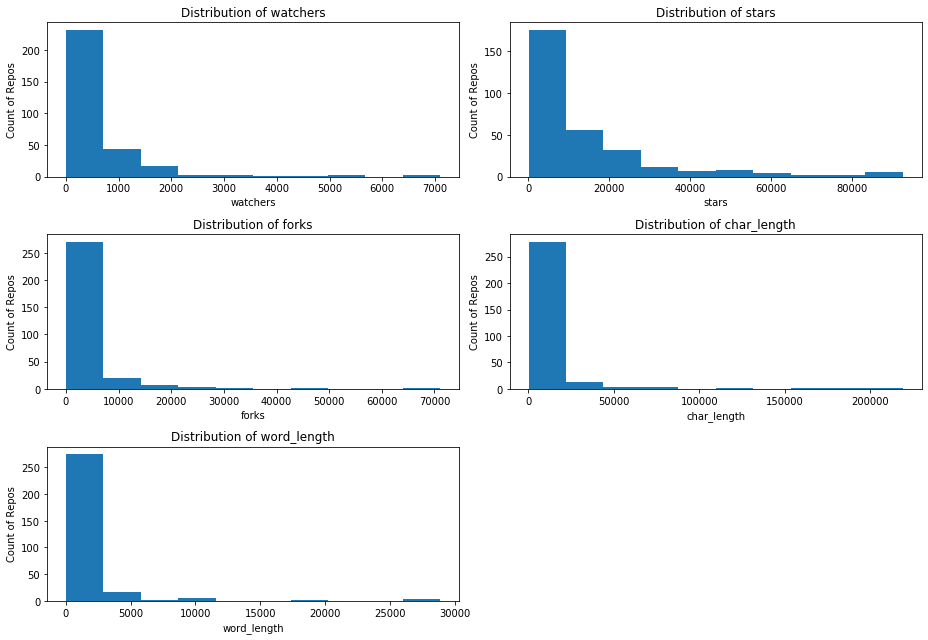

In [31]:
# lets plot all of the numerical data types in our dataframe to see how they are distributed

x = 1
plt.figure(figsize=(13,9))
for col in df.describe():
    
    plt.subplot(3,2,x)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Repos')
    plt.hist(df[col])
    x = x + 1
    
plt.tight_layout()

## Splitting the DF Into Train and Validate for Bivariate Analysis and Modeling
- Prepare Function Splits DF Into 63% Train, 27% Validate, 10% Test

In [32]:
train, validate, test = Prepare.train_validate(df)

train shape:  (190, 14) , validate shape:  (82, 14) , test shape:  (31, 14)

train percent:  63.0 , validate percent:  27.0 , test percent:  10.0


In [33]:
train.language.value_counts()

javascript    53
python        52
java          43
swift         42
Name: language, dtype: int64

## Exploration

#### Plotting Word Proportion by Langauge

In [34]:
# creating words per language

python_words = ' '.join(train[train.language == 'python'].filtered)
java_words = ' '.join(train[train.language == 'java'].filtered)
javascript_words = ' '.join(train[train.language == 'javascript'].filtered)
swift_words = ' '.join(train[train.language == 'swift'].filtered)
all_words = ' '.join(train.filtered)

In [35]:
# removing white spaces

python_words = re.sub(r'\s.\s', '', python_words)
java_words = re.sub(r'\s.\s', '', java_words)
javascript_words = re.sub(r'\s.\s', '', javascript_words)
swift_words = re.sub(r'\s.\s', '', swift_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [36]:
python_words_freq = pd.Series(python_words.split()).value_counts()
java_words_freq = pd.Series(java_words.split()).value_counts()
javascript_words_freq = pd.Series(javascript_words.split()).value_counts()
swift_words_freq = pd.Series(swift_words.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [37]:
word_count = (pd.concat([all_words_freq, python_words_freq, java_words_freq, javascript_words_freq, swift_words_freq], axis=1, sort=True)
              .set_axis(['all','python', 'java', 'javascript', 'swift'], axis=1, inplace=False)
              .fillna(0).apply(lambda s: s.astype(int)))

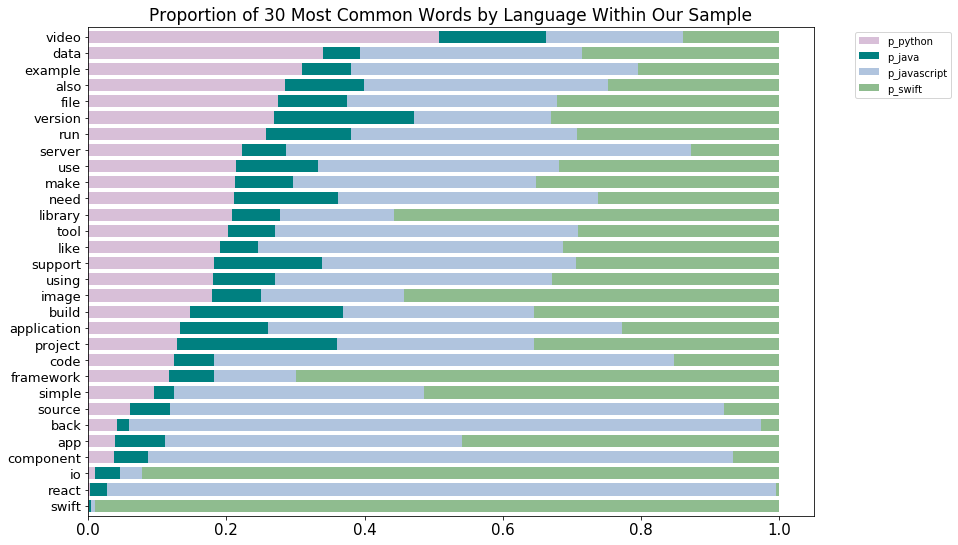

In [38]:
# lets plot the proportion of different languages amongst the top 50 occuring words

word_count.assign(p_python = word_count.python/word_count['all'],
                  p_java = word_count.java/word_count['all'],
                  p_javascript = word_count.javascript/word_count['all'],
                  p_swift = word_count.swift/word_count['all']).sort_values(by = 'all')[['p_python', 'p_java', 'p_javascript', 'p_swift']].tail(30).sort_values('p_python').plot.barh(width=.75,stacked = True, color={'darkseagreen','lightsteelblue','teal','thistle'}).legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.title('Proportion of 30 Most Common Words by Language Within Our Sample', size=17)
plt.yticks(size=13)
plt.xticks(size=15)
plt.savefig('word_prob.png')
plt.show()

### Plotting  word clouds by language

In [39]:
# creating word cloud for all of the different programming languages
python_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(python_words)
java_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(java_words)
javascript_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(javascript_words)
swift_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(swift_words)

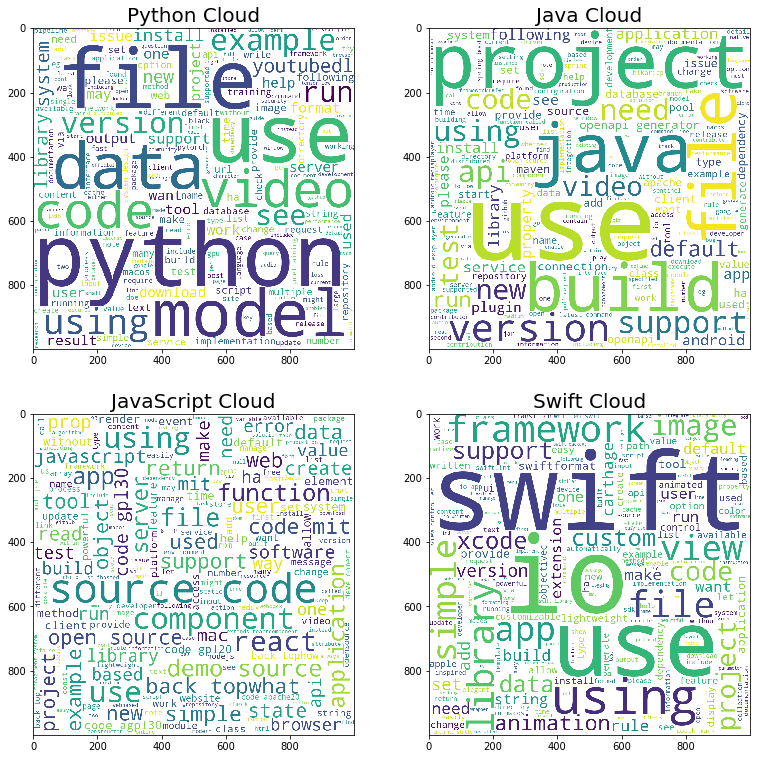

In [40]:
# plotting the word cloud
fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(python_cloud)
axes[0,0].set_title('Python Cloud', size=20)
axes[0,1].imshow(java_cloud)
axes[0,1].set_title('Java Cloud', size=20)
axes[1,0].imshow(javascript_cloud)
axes[1,0].set_title('JavaScript Cloud', size=20)
axes[1,1].imshow(swift_cloud)
axes[1,1].set_title('Swift Cloud', size=20)

plt.savefig('word_clouds.png')

### Plotting word cloud of all the words

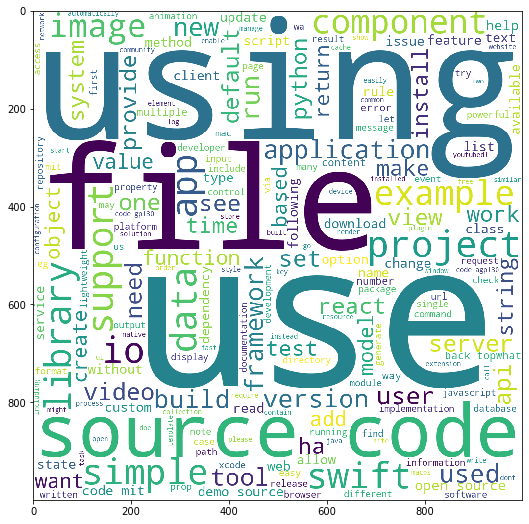

In [41]:
all_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(all_words)
plt.imshow(all_cloud)

### Plotting the frequency of bigrams in each language

In [42]:
python_bigrams = pd.Series(list(nltk.ngrams(python_words.split(), 2))).value_counts().head(25)
java_bigrams = pd.Series(list(nltk.ngrams(java_words.split(), 2))).value_counts().head(25)
javascript_bigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 2))).value_counts().head(25)
swift_bigrams = pd.Series(list(nltk.ngrams(swift_words.split(), 2))).value_counts().head(25)

Text(0.5, 0, '# Occurances')

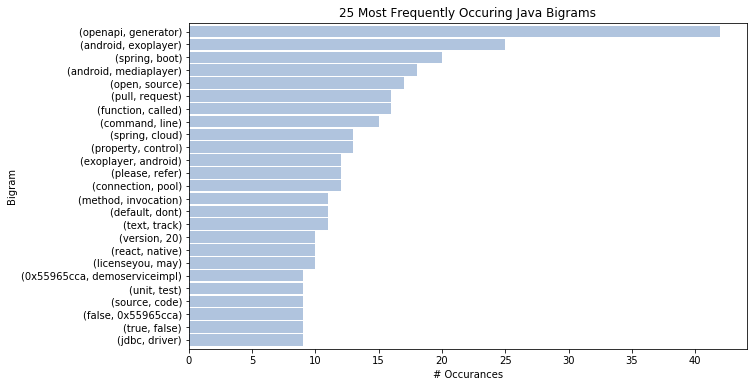

In [43]:
java_bigrams.sort_values().plot.barh(color='lightsteelblue', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

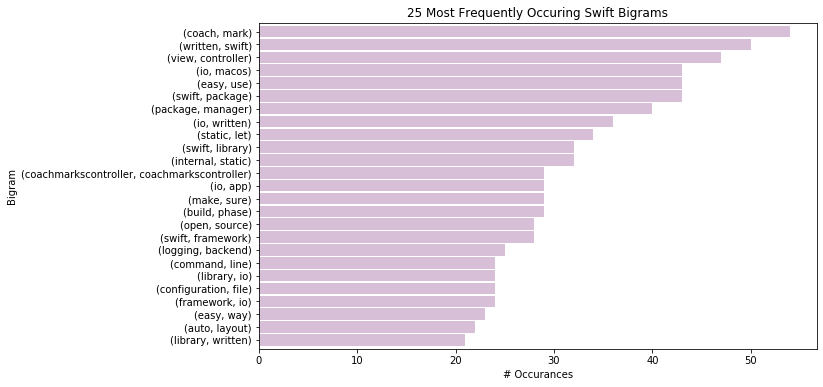

In [44]:
swift_bigrams.sort_values().plot.barh(color='thistle', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Swift Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

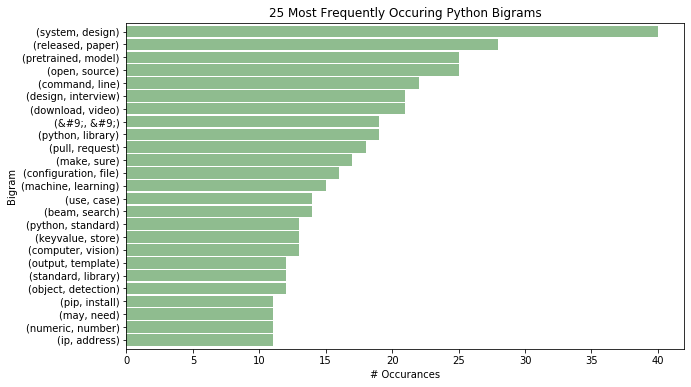

In [45]:
python_bigrams.sort_values().plot.barh(color='darkseagreen', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Python Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

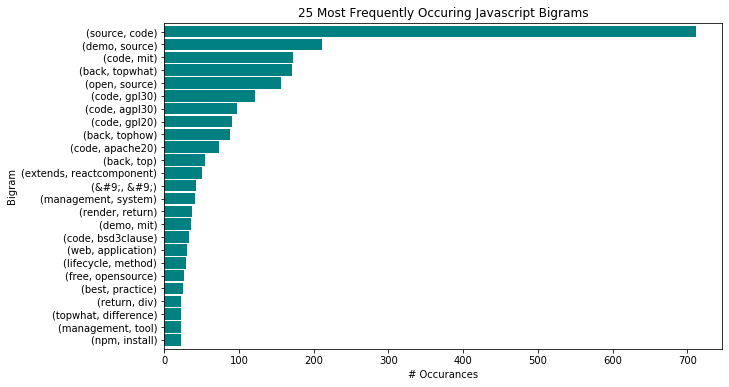

In [46]:
javascript_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Javascript Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

### Plotting bi-grams word clouds by language

In [47]:
# getting the data ready to create the word cloud of bigrams

python_data = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
java_data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
javascript_data = {k[0] + ' ' + k[1]: v for k, v in javascript_bigrams.to_dict().items()}
swift_data = {k[0] + ' ' + k[1]: v for k, v in swift_bigrams.to_dict().items()}

In [48]:
# creating the bigram cloud
cloud_python = WordCloud(background_color = 'white', height = 1000, width = 1000)\
.generate_from_frequencies(python_data)

cloud_java = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(java_data)

cloud_javascript = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(javascript_data)

cloud_swift = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(swift_data)

Text(0.5, 1.0, 'Swift Cloud Bigrams')

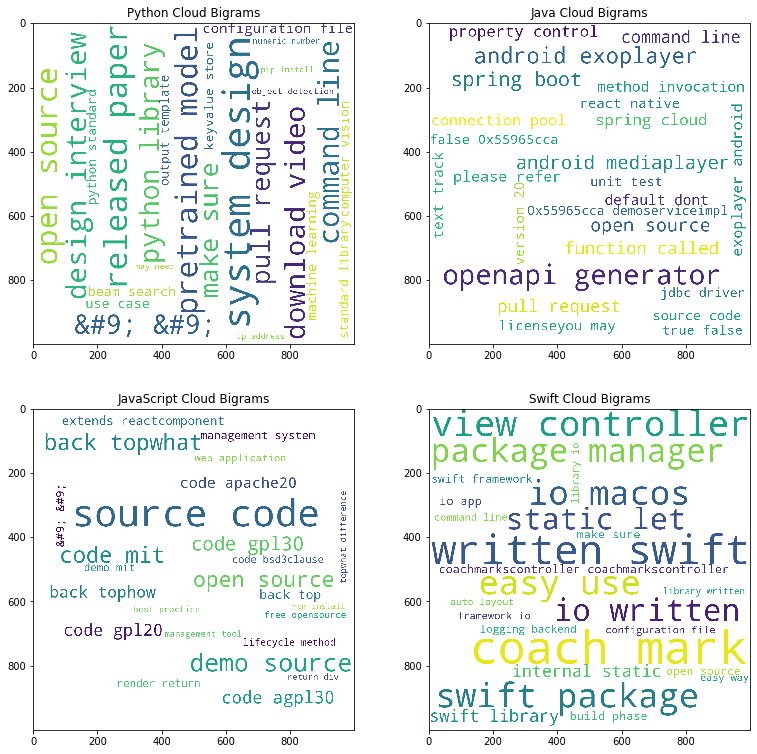

In [49]:
# plotting the bigram word cloud
fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(cloud_python)
axes[0,0].set_title('Python Cloud Bigrams')
axes[0,1].imshow(cloud_java)
axes[0,1].set_title('Java Cloud Bigrams')
axes[1,0].imshow(cloud_javascript)
axes[1,0].set_title('JavaScript Cloud Bigrams')
axes[1,1].imshow(cloud_swift)
axes[1,1].set_title('Swift Cloud Bigrams')

### Do any features correlate with Word_Length?
- not including word_length and char_length, which are derived from the same feature
- what if we control for language?

Text(0.5, 1, 'Correlation Heatmap for All Observations')

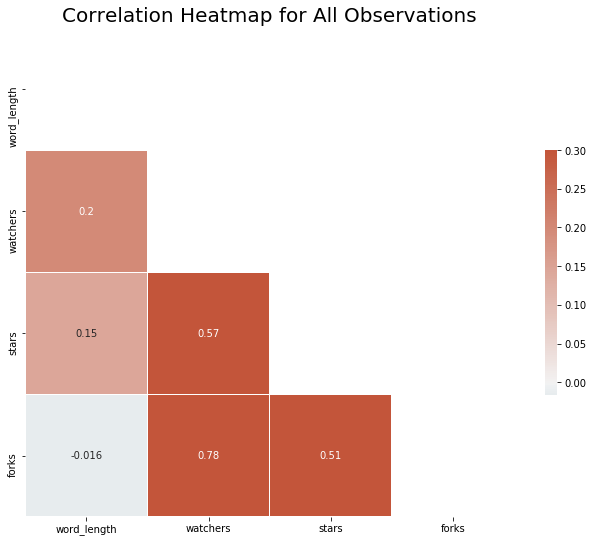

In [50]:
# sns.set_theme(style="white")

# Compute the correlation matrix
corr = (train[['language','word_length','watchers','stars','forks']].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap for All Observations', size = 20)

### Heatmap by Language

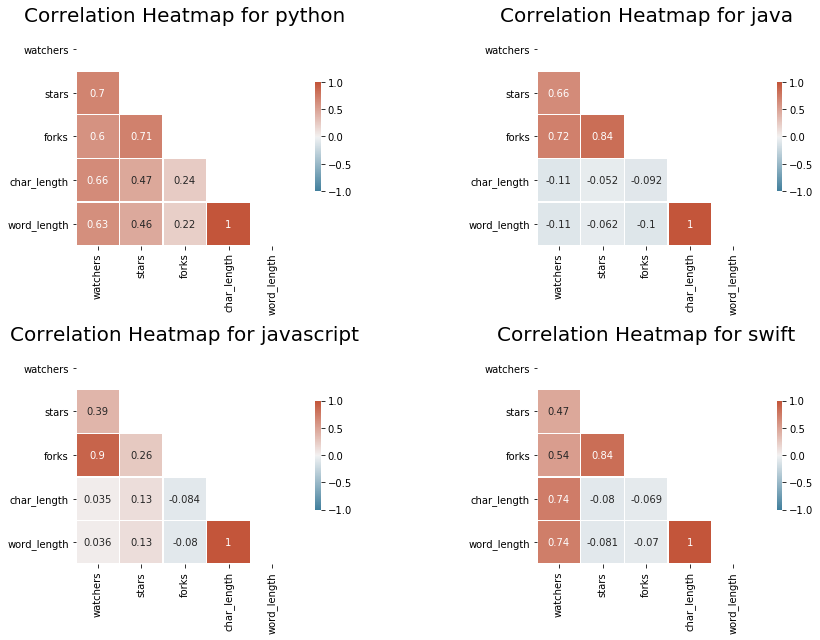

In [51]:
#sns.set_theme(style="white")

y = 1

for x in ['python','java','javascript','swift']:
    
    plt.subplot(2,2,y)
    
    # Compute the correlation matrix
    corr = (train[train[['language','word_length','watchers','stars','forks']].language == x].corr())

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title(f'Correlation Heatmap for {x}', size = 20)
    
    y+=1
    
plt.tight_layout()

plt.savefig('language_corr.png')

### Testing Significance of Correlation Between Features within Language
Null Hypothesis: There is no significant correlation between the feature and the coding language.  
Alternative Hypothesis: There is a significant correlation between the feature and at least two of the coding languages.

In [52]:
import scipy.stats as stats

In [53]:
alpha = 0.05

for feature in ['watchers','stars','forks','char_length','word_length']:
        
    F, p = stats.f_oneway(train[train.language == 'python'][feature],
                      train[train.language == 'java'][feature],
                      train[train.language == 'javascript'][feature],
                      train[train.language == 'swift'][feature])

    print(f'Anova Test Results on feature: {feature}')
    print('F-value:',F)
    print('P-value:',p)
    
    if p < alpha:
        print('We reject the null hypothesis\n')
    else:
        print('We fail to reject the null hypothesis\n')

Anova Test Results on feature: watchers
F-value: 3.3756036483193843
P-value: 0.01955080558371685
We reject the null hypothesis

Anova Test Results on feature: stars
F-value: 5.630440024081624
P-value: 0.0010264996395716725
We reject the null hypothesis

Anova Test Results on feature: forks
F-value: 2.4721724762714774
P-value: 0.06315315991707789
We fail to reject the null hypothesis

Anova Test Results on feature: char_length
F-value: 0.885030025959234
P-value: 0.4499350194466687
We fail to reject the null hypothesis

Anova Test Results on feature: word_length
F-value: 0.9880737316997233
P-value: 0.399598255812185
We fail to reject the null hypothesis



### Exploring Document Length by Language

Text(0.5, 1.0, 'Distribution of Word Length by Language')

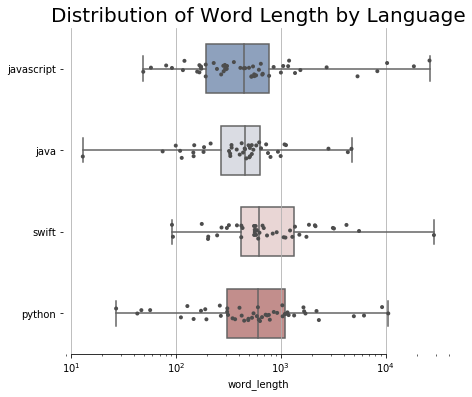

In [54]:
# sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="word_length", y="language", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="word_length", y="language", data=train,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title('Distribution of Word Length by Language', size=20)

### Do Stars, Watchers, and Forks Significantly Vary by Language?

<Figure size 2160x1080 with 0 Axes>

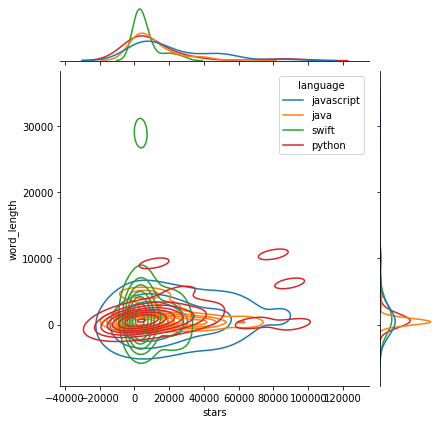

In [55]:
# sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="stars", y="word_length", hue="language",
    kind="kde",
)


<Figure size 2160x1080 with 0 Axes>

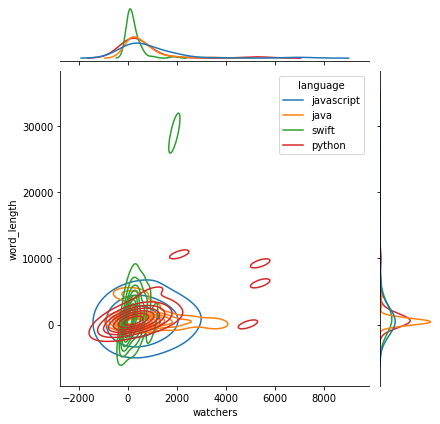

In [56]:
# sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="watchers", y="word_length", hue="language",
    kind="kde",
)

<Figure size 2160x1080 with 0 Axes>

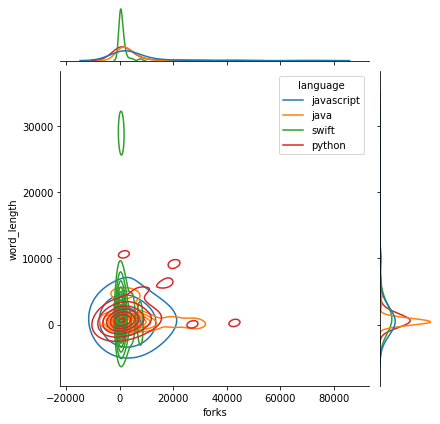

In [57]:
# sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="forks", y="word_length", hue="language",
    kind="kde",
)

### Takeaways
Conclusions:  
Next Steps:

##### [Back to Top](#top)

# Modeling <a class="anchor" id="fourth-bullet"></a>

- Import necessary modules

**Bag of Words:**

- Create bag of words from scratch
- Split data into train, test
- Create logit model object, fit, and predict
- Predict on test data
- Measure Accuracy

**TF-IDF:**

Feature Extraction: TF-IDF
- TF: Term Frequency; how often a word appears in a document.
- IDF: Inverse Documnet Frequency; a measure based on in how many documents will a word appear.
- TF-IDF: A combination of the two measures above.


TF_iDF Modeling
- create term frequency on whole df
- split into train and test for X and y
- predict on train
- predict on test
- evaluate


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

import nltk  
import random  
import string
import bs4 as bs  
import urllib.request  
import re  

In [59]:
# nltk.download('punkt')

## Bag of Words
https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/

In [60]:
df.head()

,content,watchers,stars,forks,clean,tokenized,stemmed,lemmatized,filtered,word_list,char_length,word_length,language,link
0,\nyoutube-dl - download videos from youtube.co...,2100,79900,1600,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"['youtubedl', 'download', 'video', 'from', 'yo...",69485,10608,python,https://github.com/ytdl-org/youtube-dl
1,\n\nThe lightweight PyTorch wrapper for high-p...,215,10300,1200,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"['the', 'lightweight', 'pytorch', 'wrapper', '...",6884,860,python,https://github.com/PyTorchLightning/pytorch-li...
2,RESTler\nWhat is RESTler?\nRESTler is the firs...,9,111,9,restlerwhat is restlerrestler is the first sta...,restlerwhat is restlerrestler is the first sta...,restlerwhat is restlerrestl is the first state...,restlerwhat is restlerrestler is the first sta...,restlerwhat restlerrestler first stateful rest...,"['restlerwhat', 'is', 'restlerrestler', 'is', ...",6419,944,python,https://github.com/microsoft/restler-fuzzer
3,\n\n\n\n\n\n\n\n\n\n\nCheckov is a static code...,41,1600,162,checkov is a static code analysis tool for inf...,checkov is a static code analysis tool for inf...,checkov is a static code analysi tool for infr...,checkov is a static code analysis tool for inf...,checkov static code analysis tool infrastructu...,"['checkov', 'is', 'a', 'static', 'code', 'anal...",5492,706,python,https://github.com/bridgecrewio/checkov
4,SkyAR\nPreprint | Project Page | Google Colab\...,42,1200,121,skyarpreprint project page google colaboffic...,skyarpreprint project page google colabofficia...,skyarpreprint project page googl colaboffici p...,skyarpreprint project page google colabofficia...,skyarpreprint project page google colabofficia...,"['skyarpreprint', 'project', 'page', 'google',...",4194,607,python,https://github.com/jiupinjia/SkyAR


In [61]:
# creating our own bag of words, but first, we need to get our corpus

corpus = df.filtered

corpus

0      youtubedl download video youtubecom video plat...
1      lightweight pytorch wrapper highperformance ai...
2      restlerwhat restlerrestler first stateful rest...
3      checkov static code analysis tool infrastructu...
4      skyarpreprint project page google colabofficia...
                             ...                        
298    snapkit dsl make auto layout easy io x use swi...
299    touchbar rule touchbar customization app macbo...
300    promise simplify asynchronous programming free...
301    swiftgen swiftgen tool automatically generate ...
302    phonenumberkitswift 53 framework parsing forma...
Name: filtered, Length: 303, dtype: object

In [62]:
# creating our own bag of words as a dictionary of words as keys and their count as values

wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [63]:
# getting the words whose count is 100 or more and removing anything with lower word count

import heapq
most_freq = heapq.nlargest(10_000, wordfreq, key=wordfreq.get)

In [64]:
# creating arrays of 1s and 0s based on the most_freq words list

sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [65]:
# getting sentence vectors as arrays and then assigning as X to supply it to our model later

X = np.asarray(sentence_vectors)
X

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [66]:
# setting our y variable
y = df.language

In [67]:
# getting our train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.1, random_state = 198)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, stratify=y_train, test_size=.3, random_state = 198)

In [68]:
# creating our test and train 
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

In [69]:
# getting our logit model and fitting it on x-train and y-train

lm = LogisticRegression().fit(X_train, y_train)

In [70]:
# predicting with our logit model for both train and test

train['predicted'] = lm.predict(X_train)
validate['predicted'] = lm.predict(X_validate)
test['predicted'] = lm.predict(X_test)

In [71]:
# printing accuracy and classification report for train

print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 100.00%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java          49           0       0      0
javascript     0          50       0      0
python         0           0      52      0
swift          0           0       0     39
---
              precision    recall  f1-score   support

        java       1.00      1.00      1.00        49
  javascript       1.00      1.00      1.00        50
      python       1.00      1.00      1.00        52
       swift       1.00      1.00      1.00        39

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



## Evaluating on Validate

In [72]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted))

Accuracy: 69.51%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java          19           7       8      3
javascript     0          13       3      0
python         2           1      11      0
swift          1           0       0     14
---
              precision    recall  f1-score   support

        java       0.51      0.86      0.64        22
  javascript       0.81      0.62      0.70        21
      python       0.79      0.50      0.61        22
       swift       0.93      0.82      0.87        17

    accuracy                           0.70        82
   macro avg       0.76      0.70      0.71        82
weighted avg       0.75      0.70      0.70        82



## Evaluating on Test

In [73]:
# printing accuracy and classification report for test

print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 74.19%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java           7           2       1      1
javascript     1           4       0      0
python         0           1       7      1
swift          0           1       0      5
---
              precision    recall  f1-score   support

        java       0.64      0.88      0.74         8
  javascript       0.80      0.50      0.62         8
      python       0.78      0.88      0.82         8
       swift       0.83      0.71      0.77         7

    accuracy                           0.74        31
   macro avg       0.76      0.74      0.74        31
weighted avg       0.76      0.74      0.74        31



## TF-IDF

In [74]:
# creating our tfidf object, fitting it and then transforming it

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.filtered)
y = df.language

In [75]:
# splitting our data into x_train, y_train, x_test, y_test

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state = 198)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.1, random_state = 198)

In [77]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, stratify=y_train, test_size=.3, random_state = 198)

In [78]:
X_train.shape, X_validate.shape, X_test.shape

((190, 60081), (82, 60081), (31, 60081))

In [79]:
# creating a train and a test dataframe with the actual value
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

In [80]:
# creating our logit model and then fitting it with X_train and y_train

lm_tfidf = LogisticRegression().fit(X_train, y_train)

In [81]:
# predicting with our logit model and storing predicitons onto the train and test dataframe 

train['predicted'] = lm_tfidf.predict(X_train)
validate['predicted'] = lm_tfidf.predict(X_validate)
test['predicted'] = lm_tfidf.predict(X_test)

In [82]:
# printing the accuracy and the classification report for the X_train

print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 99.47%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java          49           0       0      1
javascript     0          50       0      0
python         0           0      52      0
swift          0           0       0     38
---
              precision    recall  f1-score   support

        java       0.98      1.00      0.99        49
  javascript       1.00      1.00      1.00        50
      python       1.00      1.00      1.00        52
       swift       1.00      0.97      0.99        39

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190



## Evaluating on Validate

In [83]:
# printing the accuracy and the classification report for the X_train

print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted))

Accuracy: 74.39%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java          19           0       2      0
javascript     2          18       4      6
python         1           3      16      3
swift          0           0       0      8
---
              precision    recall  f1-score   support

        java       0.90      0.86      0.88        22
  javascript       0.60      0.86      0.71        21
      python       0.70      0.73      0.71        22
       swift       1.00      0.47      0.64        17

    accuracy                           0.74        82
   macro avg       0.80      0.73      0.74        82
weighted avg       0.79      0.74      0.74        82



## Evaluating on Test (X_test)

In [84]:
# printing accuracy and classification report on the X_test

print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 77.42%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java           8           1       0      0
javascript     0           5       0      3
python         0           2       8      1
swift          0           0       0      3
---
              precision    recall  f1-score   support

        java       0.89      1.00      0.94         8
  javascript       0.62      0.62      0.62         8
      python       0.73      1.00      0.84         8
       swift       1.00      0.43      0.60         7

    accuracy                           0.77        31
   macro avg       0.81      0.76      0.75        31
weighted avg       0.80      0.77      0.76        31



### Takeaways:
- Logit Model using the TF-IDF method to word vecotrization had the prediciton accuracy of 75% with test data. So, this will be our model of choice

## Can we use other features to predict the language?

### Random Forest using Watchers, Stars, Forks, and Doc Length

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5)

train, validate, test = Prepare.train_validate(df)

X_train = train[['watchers','stars','forks','char_length']]
y_train = train[['language']]

X_validate = validate[['watchers','stars','forks','char_length']]
y_validate = validate[['language']]

rf.fit(X_train, y_train)

print(rf.feature_importances_)

train shape:  (190, 14) , validate shape:  (82, 14) , test shape:  (31, 14)

train percent:  63.0 , validate percent:  27.0 , test percent:  10.0
[0.24659632 0.28933329 0.24374151 0.22032888]


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [87]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

Accuracy of random forest classifier on training set: 0.86
[[33  3  6  1]
 [ 0 49  0  4]
 [ 1  4 47  0]
 [ 2  1  5 34]]
              precision    recall  f1-score   support

        java       0.92      0.77      0.84        43
  javascript       0.86      0.92      0.89        53
      python       0.81      0.90      0.85        52
       swift       0.87      0.81      0.84        42

    accuracy                           0.86       190
   macro avg       0.86      0.85      0.86       190
weighted avg       0.86      0.86      0.86       190



In [88]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.41


# Final Conclusions <a class="anchor" id="fifth-bullet"></a>

### We were able to create a model using Term Frequency - Inverse Document Frequency and Logistic Regression that would predict the language used in the repository with 77% accuracy

- Models created on bag of words was not as accurate
- Models crated on Watchers, Stars, etc. was not sufficent for prediction

### Next Steps
- Add more words to the list of stop words to remove unnecessary noise from the data
- Investigate trigrams to see if we can discover any patterns
- Are there other features we can scrape to improve the model using these features? 
    - Number of contributors
    - About blurb description
- Acquire more data observations

##### [Back to Top](#top)